# Coral Analysis

In [1]:
import turicreate

In [2]:
import re

In [4]:
# summary = turicreate.SFrame('crossrefSummary.csv')
# summary = turicreate.SFrame('scholarSummary.csv')
summary = turicreate.SFrame('selectedSummary.csv')

Finished parsing file /home/liz/coral/pdf-analysis/selectedSummary.csv

Parsing completed. Parsed 76 lines in 0.016628 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/liz/coral/pdf-analysis/selectedSummary.csv

Parsing completed. Parsed 76 lines in 0.017815 secs.

In [5]:
summary = summary[summary['Abstract'] != None]  # only search documents where abstract was found

### Search text for all Acropora species (species list taken from Acropora Wiki)

In [6]:
species_list = []
with open('acroporaSpecies.txt', 'r') as f:
    text = f.read()
    species_list = re.findall('(?<=\n)[A-Za-z]+ [a-z]+', text) # pull out species names only
len(species_list)

289

In [7]:
def searchSpecies(text):
    species_found = []
    for species in species_list:
        # e.g. search for Acropora digitifera or A. digitifera 
        #if species in text or re.search(species[0]+'[\.]? '+species.split(' ')[1], text):
        if species in text or re.search(species[0]+'[\.]? '+species.split(' ')[1], text):
            species_found.append(species)
    return species_found

In [8]:
summary['Species present'] = summary['Abstract'].apply(searchSpecies)
summary

ID,DOI,Title,Date
10.1038_s41598-018-21267-3 ...,10.1038/s41598-018-21267-3 ...,Elevated CO 2 delays theearly development of ...,None
10.1016_j.marpolbul.2016.03.068 ...,10.1016/j.marpolbul.2016.03.068 ...,Proteomic analysis ofbleached and unbleached ...,19 April 2016
10.1186_s12864-015-2355-x,10.1186/s12864-015-2355-x,Functional conservationof the apoptotic ...,None
10.1111_mec.15642,10.1111/mec.15642,Local acclimatisation-driven differential gene ...,None
10.1371_journal.pone.0016095 ...,10.1371/journal.pone.0016095 ...,Regulation of ApoptoticMediators Reveals Dyn ...,"January 24, 2011"
10.1007_s10126-020-09984-1 ...,10.1007/s10126-020-09984-1 ...,Transcriptome Analyses ofImmune System Behaviors ...,21 July 2020
10.1371_journal.pone.0020140 ...,10.1371/journal.pone.0020140 ...,Identification of Fast-Evolving Genes in the ...,"June 20, 2011"
10.1371_journal.pone.0081821 ...,10.1371/journal.pone.0081821 ...,RNA-seq Profiles ofImmune Related Genes in ...,"November 21, 2013"
10.1086_692717,None,Early TranscriptionalResponses during Heat ...,31 May 2017
10.5539_ijb.v4n1p3,10.5539/ijb.v4n1p3,Effects of Heat Stress onPhytopigments of ...,"January 1, 2012"


In [9]:
species_info = turicreate.SFrame({'Species': species_list})

# Count the number of papers referencing a given species
def totalPapersWithSpecies(species):
    return sum([species in species_pres for species_pres in summary['Species present']])
  
species_info['Total papers'] = species_info['Species'].apply(totalPapersWithSpecies)

### Most Commonly Studied Species

In [10]:
species_info = species_info.sort('Total papers', ascending=False)

In [11]:
species_info

Species,Total papers
Acropora millepora,20
Acropora palmata,11
Acropora digitifera,8
Acropora tenuis,7
Acropora cervicornis,3
Acropora aspera,3
Acropora hyacinthus,2
Acropora nasuta,2
Acropora aculeus,1
Acropora microphthalma,1


In [12]:
sum(species_info['Total papers'] > 0)  # count how many species appear at all in any paper
species_info[species_info['Total papers'] > 0]['Species']

dtype: str
Rows: ?
['Acropora millepora', 'Acropora palmata', 'Acropora digitifera', 'Acropora tenuis', 'Acropora cervicornis', 'Acropora aspera', 'Acropora hyacinthus', 'Acropora nasuta', 'Acropora aculeus', 'Acropora microphthalma', 'Montipora digitata', 'Acropora gemmifera', 'Acropora muricata', 'Acropora humilis', ... ]

### Search text for all proteins on Uniprot for Acropora

In [13]:
def simplifyProteinName(protein_name):
    protein_name = re.sub(' \(.*\)', '', protein_name)  # remove anything in parentheses, unlikely to match
    protein_name = re.sub('  ', ' ', protein_name)  # get rid of double spaces
    return protein_name

def removeCommonGeneNames(gene_name):
    if len(gene_name) < 4 or re.match('[0-9\.]+', gene_name):
        gene_name = None
    return gene_name

In [14]:
swissprot = turicreate.SFrame.read_csv('swissprot_all.tab', '\t')
swissprot = swissprot.rename({'Gene names  (primary )':'Gene names'})
swissprot['Protein names'] = swissprot['Protein names'].apply(simplifyProteinName)  # make names more searchable
swissprot['Gene names'] = swissprot['Gene names'].apply(removeCommonGeneNames)  # some gene names are common words
swissprot = swissprot['Protein names', 'Gene names'].unique()  # remove duplicates
swissprot = swissprot.swap_columns('Protein names', 'Gene names')
summary = summary[summary['Language'] == 'en']  # only search documents written in english
summary

Successfully parsed 3 tokens: 
	0: Q58251
	1: reviewed
	2: [Methyl-co ... C 2.1.1.-)

Successfully parsed 3 tokens: 
	0: A0A5Q0MUT1
	1: reviewed
	2: [Thr6, Val ... hyllokinin

Successfully parsed 3 tokens: 
	0: L0PJV8
	1: reviewed
	2: [Thr6]-bra ... radykinin]

Successfully parsed 3 tokens: 
	0: P86629
	1: reviewed
	2: [Thr6]-bradykinin

Successfully parsed 3 tokens: 
	0: P86815
	1: reviewed
	2: [Ala1,Thr6 ... ys,Ala,Val

Successfully parsed 3 tokens: 
	0: P86812
	1: reviewed
	2: [Ala1,Thr6 ... bradykinin

Successfully parsed 3 tokens: 
	0: P21850
	1: reviewed
	2: [D-Ala2]-d ... orphin I)]

Successfully parsed 3 tokens: 
	0: P86814
	1: reviewed
	2: [Ala1,Thr6 ... yl-Ser,Lys

Successfully parsed 3 tokens: 
	0: P86035
	1: reviewed
	2: [Asp6]-bradykinin

Successfully parsed 3 tokens: 
	0: P86818
	1: reviewed
	2: [Ala1,Thr6 ... hyllokinin

40 lines failed to parse correctly

Finished parsing file /home/liz/coral/pdf-analysis/swissprot_all.tab

Parsing completed. Parsed 100 lines in 0.488788 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Successfully parsed 3 tokens: 
	0: Q58251
	1: reviewed
	2: [Methyl-co ...  2.1.1.-)

Successfully parsed 3 tokens: 
	0: A0A5Q0MUT1
	1: reviewed
	2: [Thr6, Val ... yllokinin

Successfully parsed 3 tokens: 
	0: L0PJV8
	1: reviewed
	2: [Thr6]-bra ... adykinin]

Successfully parsed 3 tokens: 
	0: P86629
	1: reviewed
	2: [Thr6]-bradykinin

Successfully parsed 3 tokens: 
	0: P86815
	1: reviewed
	2: [Ala1,Thr6 ... s,Ala,Val

Successfully parsed 3 tokens: 
	0: P86812
	1: reviewed
	2: [Ala1,Thr6 ... radykinin

Successfully parsed 3 tokens: 
	0: P21850
	1: reviewed
	2: [D-Ala2]-d ... rphin I)]

Successfully parsed 3 tokens: 
	0: P86814
	1: reviewed
	2: [Ala1,Thr6 ... l-Ser,Lys

Successfully parsed 3 tokens: 
	0: P86035
	1: reviewed
	2: [Asp6]-bradykinin

Successfully parsed 3 tokens: 
	0: P86818
	1: reviewed
	2: [Ala1,Thr6 ... yllokinin

Read 531163 lines. Lines per second: 1.38069e+06

43 lines failed to parse correctly

Finished parsing file /home/liz/coral/pdf-analysis/swissprot_all.tab

Parsing completed. Parsed 563929 lines in 0.396998 secs.

ID,DOI,Title,Date
10.1038_s41598-018-21267-3 ...,10.1038/s41598-018-21267-3 ...,Elevated CO 2 delays theearly development of ...,None
10.1016_j.marpolbul.2016.03.068 ...,10.1016/j.marpolbul.2016.03.068 ...,Proteomic analysis ofbleached and unbleached ...,19 April 2016
10.1186_s12864-015-2355-x,10.1186/s12864-015-2355-x,Functional conservationof the apoptotic ...,None
10.1111_mec.15642,10.1111/mec.15642,Local acclimatisation-driven differential gene ...,None
10.1371_journal.pone.0016095 ...,10.1371/journal.pone.0016095 ...,Regulation of ApoptoticMediators Reveals Dyn ...,"January 24, 2011"
10.1007_s10126-020-09984-1 ...,10.1007/s10126-020-09984-1 ...,Transcriptome Analyses ofImmune System Behaviors ...,21 July 2020
10.1371_journal.pone.0020140 ...,10.1371/journal.pone.0020140 ...,Identification of Fast-Evolving Genes in the ...,"June 20, 2011"
10.1371_journal.pone.0081821 ...,10.1371/journal.pone.0081821 ...,RNA-seq Profiles ofImmune Related Genes in ...,"November 21, 2013"
10.1086_692717,None,Early TranscriptionalResponses during Heat ...,31 May 2017
10.5539_ijb.v4n1p3,10.5539/ijb.v4n1p3,Effects of Heat Stress onPhytopigments of ...,"January 1, 2012"


In [15]:
def searchGenes(text):
    print(".", end="")
    gene_list = []
    for gene in swissprot:
        gene_name = gene['Gene names']
        protein_name = gene['Protein names']
        if protein_name in text:
            gene_list.append(protein_name)  # found match
        elif gene_name:
            gene_name = re.sub(r'\\', r'\\\\', gene_name)  # escape any backslash characters in gene names
            reg = re.compile('(?<=[^a-zA-Z])'+gene_name+'(?=[^a-zA-Z])') # don't let the gene name be part of a word
            if re.search(reg, text):
                gene_list.append(gene_name)
    return gene_list


In [16]:
# This can take some time (searching for all proteins/genes is swissprot)...
summary['Genes present'] = summary['Abstract'].apply(searchGenes)
summary.materialize()

.........................................................................

In [17]:
summary

ID,DOI,Title,Date
10.1038_s41598-018-21267-3 ...,10.1038/s41598-018-21267-3 ...,Elevated CO 2 delays theearly development of ...,None
10.1016_j.marpolbul.2016.03.068 ...,10.1016/j.marpolbul.2016.03.068 ...,Proteomic analysis ofbleached and unbleached ...,19 April 2016
10.1186_s12864-015-2355-x,10.1186/s12864-015-2355-x,Functional conservationof the apoptotic ...,None
10.1111_mec.15642,10.1111/mec.15642,Local acclimatisation-driven differential gene ...,None
10.1371_journal.pone.0016095 ...,10.1371/journal.pone.0016095 ...,Regulation of ApoptoticMediators Reveals Dyn ...,"January 24, 2011"
10.1007_s10126-020-09984-1 ...,10.1007/s10126-020-09984-1 ...,Transcriptome Analyses ofImmune System Behaviors ...,21 July 2020
10.1371_journal.pone.0020140 ...,10.1371/journal.pone.0020140 ...,Identification of Fast-Evolving Genes in the ...,"June 20, 2011"
10.1371_journal.pone.0081821 ...,10.1371/journal.pone.0081821 ...,RNA-seq Profiles ofImmune Related Genes in ...,"November 21, 2013"
10.1086_692717,None,Early TranscriptionalResponses during Heat ...,31 May 2017
10.5539_ijb.v4n1p3,10.5539/ijb.v4n1p3,Effects of Heat Stress onPhytopigments of ...,"January 1, 2012"


In [18]:
def totalPapersWithGene(gene_record):
    total_papers = 0
    protein_name = gene_record['Protein names']
    gene_name = gene_record['Gene names']
    for gene_list in summary['Genes present']:
        if protein_name in gene_list or gene_name in gene_list:
            total_papers += 1
    return total_papers

In [19]:
gene_info = swissprot
gene_info['Total papers'] = gene_info.apply(totalPapersWithGene)
gene_info.materialize()
gene_info = gene_info.sort('Total papers', ascending=False)
totalPapersContainingGenes = sum(len(gene_list) > 0 for gene_list in summary['Genes present'])
gene_info[gene_info['Total papers'] > 0]['Gene names']

dtype: str
Rows: ?
['CMT2', 'Dnmt3a', 'DRM1A', 'Dnmt3c', 'CMT3', 'DMT1', 'dnmA', 'Dnmt3b', 'DNMT1', 'DNMT3A', 'MET4', 'MET3', 'MET2A', 'ZMET5', 'DRM2', 'MET1B', 'CMT1', 'Dnmt1', 'DNMT3B', 'MET2', 'DMT105', 'MET1A', 'DRM1', 'DNMT', 'term', 'impact', 'impact', 'pcif1', 'PCIF1', 'Pcif1', 'alpha', 'alpha', 'alpha', 'alpha', 'alpha', 'cope', 'NOP2C', 'HSP70', 'HSP70', 'HSP70', 'HSP70', 'HSP70', 'RPL37', 'QCR2', 'RPL3', 'RPS27A', 'RPS27A', 'RPS2', None, 'NLRC5', 'pdp1', 'RPS27A', 'GSE1', 'RPL3', 'adcyap1', 'Dgat1', 'CCT7', 'NAIP', 'rmtB', 'Hsf1', 'CCT7', 'RPS27A', 'star', None, 'bud23', 'ACTB', 'RPS2', None, 'hsf1', 'HSP90', 'hsp70', 'HSP90', 'kamB', 'beta', 'ACTB', 'fmrO', 'BUD23', 'RID2', 'star', 'TATA', 'RPL3', 'TUBB', 'NLRC3', 'ACTB', 'BTRC', 'EF1A', 'slim', 'RPS2', 'HSP90', 'rmtC', 'TUBB', 'csnk1d', 'npmA', None, ... ]

### Find loose matches hiding in a phrase like "wnt-like genes" or "ras-related proteins"

In [20]:
def findPossibleGeneTerms(text):
    return re.findall('\w+(?=-related|-like)', text)

In [21]:
summary['Possible gene terms'] = summary['Abstract'].apply(findPossibleGeneTerms)
summary[summary['Possible gene terms']]


ID,DOI,Title,Date
10.1186_s12864-015-2355-x,10.1186/s12864-015-2355-x,Functional conservationof the apoptotic ...,None
10.1371_journal.pone.0016095 ...,10.1371/journal.pone.0016095 ...,Regulation of ApoptoticMediators Reveals Dyn ...,"January 24, 2011"
10.1371_journal.pone.0081821 ...,10.1371/journal.pone.0081821 ...,RNA-seq Profiles ofImmune Related Genes in ...,"November 21, 2013"
10.1086_692717,None,Early TranscriptionalResponses during Heat ...,31 May 2017
10.3354_dao069079,None,Bacterial communitystructure associated ...,None
10.1016_j.scitotenv.2019.07.280 ...,10.1016/j.scitotenv.2019.07.280 ...,Science of the TotalEnvironment ...,25 July 2019
10.1371_journal.pone.0013975 ...,10.1371/journal.pone.0013975 ...,Gene Expression in theScleractinian Acropora ...,"November 12, 2010"
10.1007_s12562-015-0862-y,10.1007/s12562-015-0862-y,Possible involvement ofTachylectin-2-like le ...,18 March 2015
10.1016_j.jembe.2012.06.020 ...,10.1016/j.jembe.2012.06.020 ...,Differential geneexpression in juvenile ...,17 July 2012
10.1186_s12864-017-3959-0,10.1186/s12864-017-3959-0,Transcriptomic analysisof the response of ...,None


## TF-IDF K-Means Clustering and Nearest Neighbors
### (cool but admittedly not useful on the current dataset - leaving it just for fun)

In [44]:
def wordsOnly(text):
    text = re.sub(',', ' ', text)
    text = re.sub('[^a-zA-Z\s]', '', text)
    return text

In [45]:
summary = summary[summary['Language'] == 'en']
summary['Abstract_Words_Only'] = summary['Abstract'].apply(wordsOnly)

In [46]:
summary['tfidf'] = turicreate.text_analytics.tf_idf(summary['Abstract_Words_Only'])
summary['tfidf']

dtype: dict
Rows: 73
[{'communities': 2.344549292093078, 'understanding': 1.7255100836868542, 'more': 1.3460204619819507, 'analysis': 1.1549652252192415, 'species': 2.6920409239639014, 'primarily': 2.9041650800285006, 'impacting': 3.597312260588446, 'assumption': 4.290459441148391, 'rubisco': 4.290459441148391, 'anhydrase': 2.9041650800285006, 'remodelling': 4.290459441148391, 'interactions': 2.498699971920336, 'involved': 1.2459370034249682, 'regulation': 2.211017899468555, 'upregulation': 2.211017899468555, 'kaniewska': 4.290459441148391, 'members': 2.211017899468555, 'family': 2.211017899468555, 'bcl': 3.1918471524802814, 'eg': 3.597312260588446, 'antiapoptotic': 3.1918471524802814, 'suite': 4.290459441148391, 'hsps': 2.9041650800285006, 'heat': 2.800175366504453, 'upregulating': 3.597312260588446, 'acclimate': 4.290459441148391, 'capacity': 3.1918471524802814, 'rocker': 4.290459441148391, 'response': 0.8247235383486646, 'strong': 2.681021528714291, 'lacked': 3.597312260588446, 'alt

### Determine which article is the nearest neighbor of a given article (based on TF-IDF in abstract)

In [47]:
nn_model = turicreate.nearest_neighbors.create(summary, features=['tfidf'], label='ID')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [48]:
nn_model.query(summary[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 1.36986     | 697us        |

| Done         |         | 100         | 2.323ms      |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,10.1038_s41598-018-21267-3 ...,0.0,1
0,10.1242_bio.2011036,0.8264984227129337,2
0,10.1111_j.1365-294x.2011.05205.x ...,0.8418079096045198,3
0,10.1016_j.margen.2015.08.001 ...,0.8490566037735849,4
0,10.1371_journal.pone.0039099 ...,0.8494623655913979,5


### Plot SSE to determine reasonable number of clusters

In [ ]:
sses = []
for k in range(1, len(summary)):
    model = turicreate.kmeans.create(summary, features=['tfidf'], num_clusters=k)
    sses.append(sum(model.cluster_info['sum_squared_distance']))

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 63        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 31        |

| 1             | 24        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 16        |

| 1             | 21        |

| 2             | 69        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 1                             |

| 2         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 53        |

| 1             | 72        |

| 2             | 69        |

| 3             | 46        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 60        |

| 1             | 39        |

| 2             | 50        |

| 3             | 2         |

| 4             | 37        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 27        |

| 1             | 57        |

| 2             | 55        |

| 3             | 8         |

| 4             | 17        |

| 5             | 3         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 62        |

| 1             | 7         |

| 2             | 0         |

| 3             | 44        |

| 4             | 46        |

| 5             | 52        |

| 6             | 53        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 48        |

| 1             | 26        |

| 2             | 42        |

| 3             | 19        |

| 4             | 41        |

| 5             | 25        |

| 7             | 46        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 55        |

| 1             | 8         |

| 2             | 10        |

| 3             | 63        |

| 4             | 69        |

| 5             | 51        |

| 8             | 2         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 20        |

| 1             | 15        |

| 2             | 24        |

| 3             | 44        |

| 4             | 62        |

| 5             | 0         |

| 9             | 12        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 1                             |

| 2         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 31        |

| 1             | 30        |

| 2             | 13        |

| 3             | 61        |

| 4             | 44        |

| 5             | 40        |

| 10            | 18        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 1                             |

| 2         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 50        |

| 1             | 52        |

| 2             | 28        |

| 3             | 6         |

| 4             | 62        |

| 5             | 30        |

| 10            | 12        |

| 11            | 61        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 1                             |

| 2         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 3         |

| 1             | 31        |

| 2             | 20        |

| 3             | 57        |

| 4             | 68        |

| 5             | 62        |

| 10            | 60        |

| 12            | 54        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 1                             |

| 2         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 72        |

| 1             | 37        |

| 2             | 42        |

| 3             | 30        |

| 4             | 22        |

| 5             | 48        |

| 10            | 52        |

| 13            | 17        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 48        |

| 1             | 18        |

| 2             | 20        |

| 3             | 64        |

| 4             | 41        |

| 5             | 35        |

| 10            | 3         |

| 14            | 65        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 1                             |

| 2         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 41        |

| 1             | 25        |

| 2             | 56        |

| 3             | 28        |

| 4             | 27        |

| 5             | 50        |

| 10            | 42        |

| 15            | 29        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 17        |

| 1             | 38        |

| 2             | 24        |

| 3             | 26        |

| 4             | 53        |

| 5             | 55        |

| 10            | 0         |

| 16            | 20        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 15        |

| 1             | 21        |

| 2             | 46        |

| 3             | 64        |

| 4             | 55        |

| 5             | 5         |

| 10            | 29        |

| 17            | 63        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 22        |

| 1             | 61        |

| 2             | 53        |

| 3             | 29        |

| 4             | 10        |

| 5             | 35        |

| 10            | 45        |

| 18            | 17        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 12        |

| 1             | 67        |

| 2             | 0         |

| 3             | 9         |

| 4             | 7         |

| 5             | 10        |

| 10            | 31        |

| 19            | 41        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 2                             |

| 2         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 21        |

| 1             | 63        |

| 2             | 12        |

| 3             | 64        |

| 4             | 59        |

| 5             | 28        |

| 10            | 52        |

| 20            | 19        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 56        |

| 1             | 48        |

| 2             | 57        |

| 3             | 53        |

| 4             | 0         |

| 5             | 7         |

| 10            | 37        |

| 21            | 51        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 59        |

| 1             | 9         |

| 2             | 57        |

| 3             | 4         |

| 4             | 49        |

| 5             | 36        |

| 10            | 5         |

| 22            | 56        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 11        |

| 1             | 8         |

| 2             | 61        |

| 3             | 4         |

| 4             | 55        |

| 5             | 63        |

| 10            | 31        |

| 23            | 34        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 64        |

| 1             | 32        |

| 2             | 61        |

| 3             | 8         |

| 4             | 55        |

| 5             | 60        |

| 10            | 52        |

| 24            | 66        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 54        |

| 1             | 22        |

| 2             | 64        |

| 3             | 55        |

| 4             | 63        |

| 5             | 30        |

| 10            | 10        |

| 25            | 58        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 39        |

| 1             | 70        |

| 2             | 12        |

| 3             | 23        |

| 4             | 60        |

| 5             | 25        |

| 10            | 0         |

| 26            | 34        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 41        |

| 1             | 61        |

| 2             | 44        |

| 3             | 72        |

| 4             | 6         |

| 5             | 56        |

| 10            | 23        |

| 27            | 31        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 10        |

| 1             | 32        |

| 2             | 28        |

| 3             | 15        |

| 4             | 63        |

| 5             | 37        |

| 10            | 35        |

| 28            | 45        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 1                             |

| 2         | 1                             |

| 3         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 9         |

| 1             | 3         |

| 2             | 36        |

| 3             | 0         |

| 4             | 32        |

| 5             | 44        |

| 10            | 38        |

| 29            | 72        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 45        |

| 1             | 71        |

| 2             | 13        |

| 3             | 7         |

| 4             | 68        |

| 5             | 25        |

| 10            | 17        |

| 30            | 18        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 60        |

| 1             | 0         |

| 2             | 29        |

| 3             | 27        |

| 4             | 10        |

| 5             | 14        |

| 10            | 64        |

| 31            | 8         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 15        |

| 1             | 33        |

| 2             | 5         |

| 3             | 37        |

| 4             | 44        |

| 5             | 48        |

| 10            | 12        |

| 32            | 25        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 59        |

| 1             | 0         |

| 2             | 45        |

| 3             | 10        |

| 4             | 46        |

| 5             | 65        |

| 10            | 72        |

| 33            | 9         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 4         |

| 1             | 10        |

| 2             | 61        |

| 3             | 23        |

| 4             | 68        |

| 5             | 16        |

| 10            | 37        |

| 34            | 18        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 29        |

| 1             | 55        |

| 2             | 38        |

| 3             | 9         |

| 4             | 14        |

| 5             | 61        |

| 10            | 59        |

| 35            | 18        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 24        |

| 1             | 57        |

| 2             | 36        |

| 3             | 1         |

| 4             | 17        |

| 5             | 41        |

| 10            | 37        |

| 36            | 40        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 55        |

| 1             | 12        |

| 2             | 52        |

| 3             | 4         |

| 4             | 5         |

| 5             | 32        |

| 10            | 30        |

| 37            | 69        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

In [28]:
from matplotlib import pyplot as plt

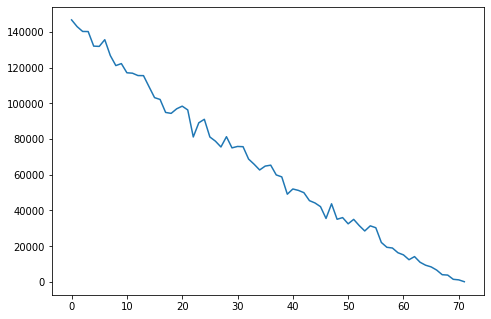

In [43]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(range(len(sses)),sses)

### Manually choose k, perform K-Means clustering

In [40]:
k = 21
kmeans_model = turicreate.kmeans.create(summary, features=['tfidf'], num_clusters=k)

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 65        |

| 1             | 69        |

| 2             | 39        |

| 3             | 6         |

| 4             | 62        |

| 5             | 51        |

| 10            | 44        |

| 20            | 10        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 1                             |

| 2         | 0                             |

+-----------+-------------------------------+

In [41]:
kmeans_model.cluster_info.print_rows(num_rows=k)

+-------------------------------+------------+------+----------------------+
|             tfidf             | cluster_id | size | sum_squared_distance |
+-------------------------------+------------+------+----------------------+
| {'a': 0.2573004652722753, ... |     0      |  1   |         0.0          |
| {'a': 0.4288341087871255, ... |     1      |  1   |         0.0          |
| {'abundant': 3.59731226058... |     2      |  1   |         0.0          |
| {'a': 0.3430672870297004, ... |     3      |  1   |         0.0          |
| {'a': 0.3430672870297004, ... |     4      |  1   |         0.0          |
| {'a': 0.6861345740594008, ... |     5      |  1   |         0.0          |
| {'a': 0.3130488994146017, ... |     6      |  40  |  72380.57173156738   |
| {'a': 0.3259139226782154, ... |     7      |  10  |  15396.830017089844  |
| {'a': 0.3430672870297004, ... |     8      |  1   |         0.0          |
| {'a': 0.857668217574251, '... |     9      |  1   |         0.0          |

### What are the top 10 words defining a cluster?

In [42]:
info = kmeans_model.cluster_info
for k in range(0, len(info)):
    cluster = info[info['cluster_id'] == k]
    top_words_tfidf = cluster[['tfidf']].stack('tfidf', new_column_name=['word','tfidf']).sort('tfidf', ascending=False)
    top_words = top_words_tfidf['word'][0:10]
    print(f"Cluster {k}")
    print(top_words)

Cluster 0
['winter', 'collected', 'summer', 'otsuki', 'cold', 'muricata', 'kochi', 'photochemical', 'health', 'stress']
Cluster 1
['aws', 'isolates', 'characterized', 'vibrio', 'clone', 'revealing', 'diseased', 'healthy', 'rrna', 'libraries']
Cluster 2
['cloud', 'duplicated', 'warm', 'environments', 'diverse', 'periods', 'belonging', 'survived', 'marine', 'ancestor']
Cluster 3
['selection', 'homologous', 'homologues', 'dnds', 'pairs', 'ratios', 'datasets', 'contigs', 'similarities', 'independent']
Cluster 4
['go', 'terms', 'nlrclike', 'groups', 'protein', 'overrepresented', 'pairedend', 'ubiquitination', 'aculeus', 'nfkb']
Cluster 5
['postfertilization', 'c', 'development', 'palmata', 'division', 'replicationcell', 'embryos', 'stages', 'embryonic', 'temperatures']
Cluster 6
['disease', 'domain', 'thermal', 'symbiodinium', 'stress', 'dmsp', 'colonies', 'response', 'immune', 'elevated']
Cluster 7
['et', 'al', 'stressresponsive', 'fastigiata', 'bleaching', 'reference', 'protein', 'irradia